In [1]:
!pip install numpy pandas matplotlib seaborn plotly requests tqdm opencv-python pillow wandb -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 213.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 248.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 141.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 141.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 165.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-auth 2.22.0 requires urllib3<2.0, but you have urllib3 2.2.1 which is incompatible.
tensorflow 2.13.

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


In [3]:
import time
import os

import numpy as np
from tqdm import tqdm

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


In [5]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

val_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [6]:
dataset_dir = 'Fruit-Project_split'

In [7]:
train_path = os.path.join(dataset_dir, 'train')
val_path = os.path.join(dataset_dir, 'val')
print('Training_set_path', train_path)
print('Val_set_path', val_path)

Training_set_path Fruit-Project_split/train
Val_set_path Fruit-Project_split/val


In [8]:
from torchvision import datasets

train_dataset = datasets.ImageFolder(train_path, train_transform)

val_dataset = datasets.ImageFolder(val_path, train_transform)

In [9]:
print('Number of training set images', len(train_dataset))
print('No. of categories', len(train_dataset.classes))
print('Name of each category', train_dataset.classes)

Number of training set images 30778
No. of categories 44
Name of each category ['alligator apple', 'apple', 'avocado', 'banana', 'barberry', 'bayberry', 'bell pepper', 'black berry', 'black cherry', 'blueberry', 'bottle gourd', 'cantaloupe', 'carambola', 'cherry', 'coconut', 'corn kernel', 'custard apple', 'dragonfruit', 'durian', 'eggplant', 'fig', 'grape', 'jackfruit', 'jalapeno', 'kiwi', 'lemon', 'lime', 'longan', 'macadamia', 'mango', 'orange', 'papaya', 'pea', 'peanut', 'pear', 'persimmon', 'pineapple', 'pomegranate', 'pumpkin', 'saguaro', 'strawberry', 'tomato', 'watermelon', 'zucchini']


In [10]:
print('Number of val set images', len(val_dataset))
print('No. of categories', len(val_dataset.classes))
print('Name of each category', val_dataset.classes)

Number of val set images 8764
No. of categories 44
Name of each category ['alligator apple', 'apple', 'avocado', 'banana', 'barberry', 'bayberry', 'bell pepper', 'black berry', 'black cherry', 'blueberry', 'bottle gourd', 'cantaloupe', 'carambola', 'cherry', 'coconut', 'corn kernel', 'custard apple', 'dragonfruit', 'durian', 'eggplant', 'fig', 'grape', 'jackfruit', 'jalapeno', 'kiwi', 'lemon', 'lime', 'longan', 'macadamia', 'mango', 'orange', 'papaya', 'pea', 'peanut', 'pear', 'persimmon', 'pineapple', 'pomegranate', 'pumpkin', 'saguaro', 'strawberry', 'tomato', 'watermelon', 'zucchini']


In [11]:
class_names = train_dataset.classes
n_class = len(class_names)

In [12]:
class_names

['alligator apple',
 'apple',
 'avocado',
 'banana',
 'barberry',
 'bayberry',
 'bell pepper',
 'black berry',
 'black cherry',
 'blueberry',
 'bottle gourd',
 'cantaloupe',
 'carambola',
 'cherry',
 'coconut',
 'corn kernel',
 'custard apple',
 'dragonfruit',
 'durian',
 'eggplant',
 'fig',
 'grape',
 'jackfruit',
 'jalapeno',
 'kiwi',
 'lemon',
 'lime',
 'longan',
 'macadamia',
 'mango',
 'orange',
 'papaya',
 'pea',
 'peanut',
 'pear',
 'persimmon',
 'pineapple',
 'pomegranate',
 'pumpkin',
 'saguaro',
 'strawberry',
 'tomato',
 'watermelon',
 'zucchini']

In [13]:
train_dataset.class_to_idx

{'alligator apple': 0,
 'apple': 1,
 'avocado': 2,
 'banana': 3,
 'barberry': 4,
 'bayberry': 5,
 'bell pepper': 6,
 'black berry': 7,
 'black cherry': 8,
 'blueberry': 9,
 'bottle gourd': 10,
 'cantaloupe': 11,
 'carambola': 12,
 'cherry': 13,
 'coconut': 14,
 'corn kernel': 15,
 'custard apple': 16,
 'dragonfruit': 17,
 'durian': 18,
 'eggplant': 19,
 'fig': 20,
 'grape': 21,
 'jackfruit': 22,
 'jalapeno': 23,
 'kiwi': 24,
 'lemon': 25,
 'lime': 26,
 'longan': 27,
 'macadamia': 28,
 'mango': 29,
 'orange': 30,
 'papaya': 31,
 'pea': 32,
 'peanut': 33,
 'pear': 34,
 'persimmon': 35,
 'pineapple': 36,
 'pomegranate': 37,
 'pumpkin': 38,
 'saguaro': 39,
 'strawberry': 40,
 'tomato': 41,
 'watermelon': 42,
 'zucchini': 43}

In [14]:
idx_to_labels = {y:x for x,y in train_dataset.class_to_idx.items()}

In [15]:
idx_to_labels

{0: 'alligator apple',
 1: 'apple',
 2: 'avocado',
 3: 'banana',
 4: 'barberry',
 5: 'bayberry',
 6: 'bell pepper',
 7: 'black berry',
 8: 'black cherry',
 9: 'blueberry',
 10: 'bottle gourd',
 11: 'cantaloupe',
 12: 'carambola',
 13: 'cherry',
 14: 'coconut',
 15: 'corn kernel',
 16: 'custard apple',
 17: 'dragonfruit',
 18: 'durian',
 19: 'eggplant',
 20: 'fig',
 21: 'grape',
 22: 'jackfruit',
 23: 'jalapeno',
 24: 'kiwi',
 25: 'lemon',
 26: 'lime',
 27: 'longan',
 28: 'macadamia',
 29: 'mango',
 30: 'orange',
 31: 'papaya',
 32: 'pea',
 33: 'peanut',
 34: 'pear',
 35: 'persimmon',
 36: 'pineapple',
 37: 'pomegranate',
 38: 'pumpkin',
 39: 'saguaro',
 40: 'strawberry',
 41: 'tomato',
 42: 'watermelon',
 43: 'zucchini'}

In [16]:
from torch.utils.data import DataLoader

In [17]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=4
                         )

val_loader = DataLoader(val_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4
                        )

In [18]:
images, labels = next(iter(train_loader))

In [19]:
images.shape

torch.Size([32, 3, 224, 224])

In [20]:
labels

tensor([32, 43, 13,  9,  3,  4, 25, 31, 42, 13, 35, 21, 42,  1, 28, 24,  0, 21,
        43, 19, 40, 16, 26, 24, 22, 14, 43, 42,  7, 42,  0,  1])

In [21]:
images = images.numpy()

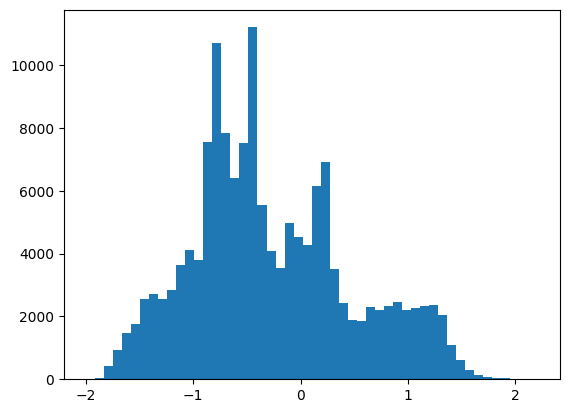

In [22]:
images[1].shape
plt.hist(images[1].flatten(), bins=50)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'label:13')

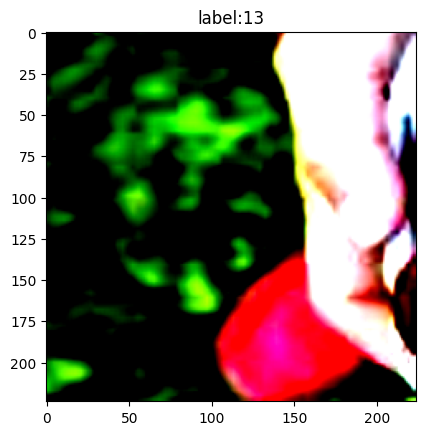

In [23]:
idx = 2
plt.imshow(images[idx].transpose((1,2,0)))
plt.title('label:'+str(labels[idx].item()))

In [24]:
label = labels[idx].item()

In [25]:
label

13

In [26]:
pred_classname = idx_to_labels[label]
pred_classname

'cherry'

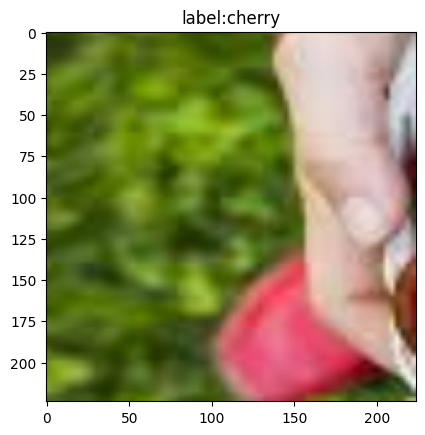

In [27]:
idx = 2
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(np.clip(images[idx].transpose((1,2,0)) * std + mean, 0, 1))
plt.title('label:'+ pred_classname)
plt.show()

In [28]:
from torchvision import models
import torch.optim as optim
from torch.optim import lr_scheduler

In [29]:
import time
import os
from tqdm import tqdm

import pandas as pd
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# # import torch
# # import torch.nn as nn
# # import torchvision.models as models

# # class EnsembleModel(nn.Module):
# #     def __init__(self, num_classes):
# #         super(EnsembleModel, self).__init__()
# #         self.resnet152 = models.resnet152(pretrained=True)
# #         self.inceptionv3 = models.inception_v3(pretrained=True)
# #         self.vgg16 = models.vgg16(pretrained=True)
        
# #         # Replace the classification layer of each model
# #         num_ftrs_resnet = self.resnet152.fc.in_features
# #         self.resnet152.fc = nn.Linear(num_ftrs_resnet, num_classes)
        
# #         num_ftrs_inception = self.inceptionv3.fc.in_features
# #         self.inceptionv3.fc = nn.Linear(num_ftrs_inception, num_classes)
        
# #         num_ftrs_vgg = self.vgg16.classifier[6].in_features
# #         self.vgg16.classifier[6] = nn.Linear(num_ftrs_vgg, num_classes)
        
# #         # Ensemble fusion layer
# #         self.fusion_layer = nn.Linear(3*num_classes, num_classes)

# #     def forward(self, x):
# #         out_resnet = self.resnet152(x.clone())  # Clone the input tensor to avoid in-place modification
# #         out_inception = self.inceptionv3(x.clone())
# #         out_vgg = self.vgg16(x.clone())
        
# #         # Concatenate the outputs of the models
# #         out = torch.cat((out_resnet, out_inception, out_vgg), dim=1)
        
# #         # Apply fusion layer
# #         out = self.fusion_layer(out)
# #         return out

# # # Example usage:
# # num_classes = 44  # Specify the number of output classes
# # ensemble_model = EnsembleModel(num_classes)

# # # Enable training for all parameters
# # for param in ensemble_model.parameters():
# #     param.requires_grad = True

# # # Now, you can use this model for further training
# # import torch
# # import torch.nn as nn
# # import torchvision.models as models
# # import torchvision.transforms as transforms

# # # Define the ensemble model
# # class EnsembleModel(nn.Module):
# #     def __init__(self, num_classes):
# #         super(EnsembleModel, self).__init__()
# #         self.resnet50 = models.resnet50(pretrained=True)
# #         self.inceptionv3 = models.inception_v3(pretrained=True, aux_logits=True, transform_input=True)  
# #         self.vgg16 = models.vgg16(pretrained=True)

# #         # Modify InceptionV3 input
# #         self.inceptionv3.Conv2d_1a_3x3.conv = nn.Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)

# #         # Freeze the parameters of the models
# #         self.freeze_parameters()

# #         # Classifier
# #         self.fc = nn.Linear(2048 + 2048 + 4096, num_classes)

# #     def forward(self, x):
# #         resnet_out = self.resnet50(x)
# #         inception_out = self.inceptionv3(x)
# #         vgg_out = self.vgg16(x)

# #         # Concatenate the features from different models
# #         combined_features = torch.cat((resnet_out, inception_out, vgg_out), dim=1)

# #         # Final classification
# #         output = self.fc(combined_features)
# #         return output

# #     def freeze_parameters(self):
# #         # Freeze parameters so we don't backprop through them
# #         for param in self.resnet50.parameters():
# #             param.requires_grad = False
# #         for param in self.inceptionv3.parameters():
# #             param.requires_grad = False
# #         for param in self.vgg16.parameters():
# #             param.requires_grad = False

# # # Initialize the ensemble model
# # num_classes = len(train_loader.dataset.classes)  # Assuming train_loader is defined
# # ensemble_model = EnsembleModel(num_classes)

# # # Optionally, move the model to GPU if available
# # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # ensemble_model.to(device)



# # Define the base models
# class EnsembleModel(nn.Module):
#     def __init__(self, num_classes):
#         super(EnsembleModel, self).__init__()
#         self.vgg16 = models.vgg16(pretrained=False)
#         self.resnet50 = models.resnet50(pretrained=False)
#         self.inception = models.inception_v3(pretrained=False)

#         self.vgg16.classifier[6] = nn.Linear(self.vgg16.classifier[6].in_features, num_classes)
#         self.resnet50.fc = nn.Linear(self.resnet50.fc.in_features, num_classes)
#         self.inception.fc = nn.Linear(self.inception.fc.in_features, num_classes)

#     def forward(self, x):
#         vgg_output = self.vgg16(x)
#         # print(vgg_output.shape)
#         resnet_output = self.resnet50(x)
#         # print(resnet_output.shape)
#         inception_output, _ = self.inception(x)
#         # print(inception_output.shape)
#         # return (vgg_output + resnet_output + inception_output) / 3.0
#         x = torch.cat((vgg_output, resnet_output, inception_output), dim=1)
#         return x
# # Initialize the ensemble model
# ensemble_model = EnsembleModel(num_classes=44).to(device)

# # import torch
# # import torch.nn as nn
# # import torchvision.models as models

# # class StackEnsembleModel(nn.Module):
# #     def __init__(self, num_classes):
# #         super(StackEnsembleModel, self).__init__()
# #         self.vgg16 = models.vgg16(pretrained=True)
# #         self.resnet50 = models.resnet50(pretrained=True)
# #         self.inceptionv3 = models.inception_v3(pretrained=True)
# #         # Modify classifier layers
# #         num_features_vgg16 = self.vgg16.classifier[-1].in_features
# #         self.vgg16.classifier[-1] = nn.Linear(num_features_vgg16, num_classes)

# #         num_features_resnet50 = self.resnet50.fc.in_features
# #         self.resnet50.fc = nn.Linear(num_features_resnet50, num_classes)

# #         num_features_inceptionv3 = self.inceptionv3.fc.in_features
# #         self.inceptionv3.fc = nn.Linear(num_features_inceptionv3, num_classes)

# #         # Final classification layer
# #         self.classifier = nn.Linear(num_classes * 3, num_classes)

# #     def forward(self, x):
# #         x_vgg16 = self.vgg16(x)
# #         x_resnet50 = self.resnet50(x)
# #         x_inceptionv3 = self.inceptionv3(x)

# #         # Get logits from InceptionOutputs object
# #         x_inceptionv3 = x_inceptionv3.logits

# #         x = torch.cat((x_vgg16, x_resnet50, x_inceptionv3), dim=1)
# #         x = self.classifier(x)
# #         return x

# # # Instantiate the StackEnsembleModel
# # num_classes = 44  # Change this according to your task
# # ensemble_model = StackEnsembleModel(num_classes)

# # # Move the model to the appropriate device
# # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # ensemble_model.to(device)


import torch
import torch.nn as nn
from torchvision import models

# 加载预训练的ResNet和AlexNet模型
efficientnet=models.efficientnet_b7(pretrained=True)
resnet = models.resnet50(pretrained=True)
alexnet = models.alexnet(pretrained=True)

for param in efficientnet.parameters():
    param.requires_grad_(True)
class WeightedEnsembleModel(nn.Module):
    def __init__(self, resnet_weight, alexnet_weight,efficientnet_weight):
        super(WeightedEnsembleModel, self).__init__()
        self.resnet = resnet
        self.alexnet = alexnet
        self.efficientnet = efficientnet

        self.resnet_weight = resnet_weight
        self.alexnet_weight = alexnet_weight
        self.efficientnet_weight=efficientnet_weight
        # 确保权重是可训练的参数
        self.resnet_weight = nn.Parameter(torch.tensor(resnet_weight))
        self.alexnet_weight = nn.Parameter(torch.tensor(alexnet_weight))
        self.efficientnet_weight = nn.Parameter(torch.tensor(efficientnet_weight))

    def forward(self, x):
        # 获取ResNet和AlexNet的输出
        resnet_output = self.resnet(x)
        alexnet_output = self.alexnet(x)
        efficientnet_output=self.efficientnet(x)
        # 加权相加
        combined_output = (self.resnet_weight * resnet_output +
                           self.alexnet_weight * alexnet_output+efficientnet_output*self.efficientnet_weight)

        return combined_output


# 创建模型实例，初始化权重
resnet_initial_weight = 0.2
alexnet_initial_weight = 0.1
efficientnet_weight =0.7

ensemble_model = WeightedEnsembleModel(resnet_initial_weight, alexnet_initial_weight,efficientnet_weight)



D:\Program Files\Anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Program Files\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
D:\Program Files\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to ge

In [31]:
optimizer = optim.Adam(ensemble_model.parameters())

In [32]:
ensemble_model = ensemble_model.to(device)

criterion = nn.CrossEntropyLoss() 


from torch.optim import lr_scheduler

lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [34]:
def train_one_batch(images, labels):
    
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = ensemble_model(images) 
    loss = criterion(outputs, labels) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1) 
    preds = preds.cpu().numpy()
    loss = loss.detach().cpu().numpy()
    outputs = outputs.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    
    log_train = {}
    log_train['epoch'] = epoch
    log_train['batch'] = batch_idx
   
    log_train['train_loss'] = loss
    log_train['train_accuracy'] = accuracy_score(labels, preds)
    log_train['train_precision'] = precision_score(labels, preds, average='macro')
    log_train['train_recall'] = recall_score(labels, preds, average='macro')
    log_train['train_f1-score'] = f1_score(labels, preds, average='macro')
    
    return log_train

In [35]:
def evaluate_valset():

    loss_list = []
    labels_list = []
    preds_list = []
    
    with torch.no_grad():
        for images, labels in val_loader: 
            images = images.to(device)
            labels = labels.to(device)
            outputs = ensemble_model(images) 


            _, preds = torch.max(outputs, 1) 
            preds = preds.cpu().numpy()
            loss = criterion(outputs, labels) 
            loss = loss.detach().cpu().numpy()
            outputs = outputs.detach().cpu().numpy()
            labels = labels.detach().cpu().numpy()

            loss_list.append(loss)
            labels_list.extend(labels)
            preds_list.extend(preds)
        
    log_val = {}
    log_val['epoch'] = epoch
    
    log_val['val_loss'] = np.mean(loss_list)
    log_val['val_accuracy'] = accuracy_score(labels_list, preds_list)
    log_val['val_precision'] = precision_score(labels_list, preds_list, average='macro')
    log_val['val_recall'] = recall_score(labels_list, preds_list, average='macro')
    log_val['val_f1-score'] = f1_score(labels_list, preds_list, average='macro')
    
    return log_val

In [36]:
epoch = 0
batch_idx = 0
best_val_accuracy = 0

In [37]:
import pandas as pd

df_train_log = pd.DataFrame()
log_train = {}
log_train['epoch'] = 0
log_train['batch'] = 0
images, labels = next(iter(train_loader))
log_train.update(train_one_batch(images, labels))
df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)

In [38]:
df_train_log

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,7.992647,0.0,0.0,0.0,0.0


In [39]:
df_val_log = pd.DataFrame()
log_val = {}
log_val['epoch'] = 0
log_val.update(evaluate_valset())
df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)

In [40]:
df_val_log

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,6.786867,0.004792,0.001223,0.000216,0.000338


In [41]:
import wandb

wandb.init(project='fruit44', name=time.strftime('%m%d%H%M%S'))

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

 ········································


wandb: Appending key for api.wandb.ai to your netrc file: /home/featurize/.netrc


In [42]:
# for epoch in range(1, EPOCHS+1):
#     print(f'Epoch {epoch}/{EPOCHS}')

#     # Training
#     ensemble_model.train()
#     total_batches = len(train_loader)
#     for batch_idx, (images, labels) in enumerate(train_loader, 1):
#         log_train = train_one_batch(images, labels)
#         df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)
#         wandb.log(log_train)

#         # Display progress
#         print(f'Training Batch {batch_idx}/{total_batches}', end='\r')

#     lr_scheduler.step()

#     # Validation
#     ensemble_model.eval()
#     log_val = evaluate_valset()
#     df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)
#     wandb.log(log_val)

#     if log_val['val_accuracy'] > best_val_accuracy:
#         old_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy)
#         if os.path.exists(old_best_checkpoint_path):
#             os.remove(old_best_checkpoint_path)

#         best_val_accuracy = log_val['val_accuracy']
#         new_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(log_val['val_accuracy'])
#         torch.save(ensemble_model, new_best_checkpoint_path)
#         print('\nSave the new best model', 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))

# # Save logs to CSV
# df_train_log.to_csv('Training_log_training_sets.csv', index=False)
# df_val_log.to_csv('Training_Log_val_Set.csv', index=False)


EPOCHS = 45
for epoch in range(1, EPOCHS+1):
    
    print(f'Epoch {epoch}/{EPOCHS}')
    
    ## 训练阶段
    ensemble_model.train()
    for images, labels in tqdm(train_loader): # 获得一个 batch 的数据和标注
        batch_idx += 1
        log_train = train_one_batch(images, labels)
        df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)
        # wandb.log(log_train)
        
    lr_scheduler.step()

    ## 测试阶段
    ensemble_model.eval()
    log_val = evaluate_valset()
    df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)
    wandb.log(log_val)
    
    # 保存最新的最佳模型文件
    if log_val['val_accuracy'] > best_val_accuracy: 
        # 删除旧的最佳模型文件(如有)
        old_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy)
        if os.path.exists(old_best_checkpoint_path):
            os.remove(old_best_checkpoint_path)
        # 保存新的最佳模型文件
        best_val_accuracy = log_val['val_accuracy']
        new_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(log_val['val_accuracy'])
        torch.save(ensemble_model, new_best_checkpoint_path)
        print('\nSave the new best model', 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))
        # best_test_accuracy = log_test['test_accuracy']

df_train_log.to_csv('Training_log_training_attention.csv', index=False)
df_val_log.to_csv('Training_Log_val_Set.attention', index=False)


# EPOCHS = 40
# total_batches_processed = 0  # 记录总共处理过的批次数

# for epoch in range(1, EPOCHS+1):
    
#     print(f'Epoch {epoch}/{EPOCHS}')
    
#     ## 训练阶段
#     ensemble_model.train()
#     for batch_idx, (images, labels) in enumerate(train_loader, start=total_batches_processed + 1):
#         log_train = train_one_batch(images, labels)
#         df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)
        
#         total_batches_processed += 1  # 更新总批次数
        
#     lr_scheduler.step()

#     ## 测试阶段
#     ensemble_model.eval()
#     log_val = evaluate_valset()
#     df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)
#     wandb.log(log_val)
    
#     # 保存最新的最佳模型文件
#     if log_val['val_accuracy'] > best_val_accuracy: 
#         # 删除旧的最佳模型文件(如有)
#         old_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy)
#         if os.path.exists(old_best_checkpoint_path):
#             os.remove(old_best_checkpoint_path)
#         # 保存新的最佳模型文件
#         best_val_accuracy = log_val['val_accuracy']
#         new_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(log_val['val_accuracy'])
#         torch.save(ensemble_model, new_best_checkpoint_path)
#         print('\nSave the new best model', 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))

# df_train_log.to_csv('Training_log_training_sets.csv', index=False)
# df_val_log.to_csv('Training_Log_val_Set.csv', index=False)

Epoch 1/45


100%|██████████| 962/962 [03:48<00:00,  4.21it/s]



Save the new best model checkpoint/best-0.770.pth
Epoch 2/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]



Save the new best model checkpoint/best-0.795.pth
Epoch 3/45


100%|██████████| 962/962 [03:49<00:00,  4.19it/s]



Save the new best model checkpoint/best-0.842.pth
Epoch 4/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]



Save the new best model checkpoint/best-0.844.pth
Epoch 5/45


100%|██████████| 962/962 [03:49<00:00,  4.19it/s]



Save the new best model checkpoint/best-0.854.pth
Epoch 6/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]



Save the new best model checkpoint/best-0.862.pth
Epoch 7/45


100%|██████████| 962/962 [03:49<00:00,  4.19it/s]


Epoch 8/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]



Save the new best model checkpoint/best-0.914.pth
Epoch 9/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]



Save the new best model checkpoint/best-0.918.pth
Epoch 10/45


100%|██████████| 962/962 [03:49<00:00,  4.18it/s]



Save the new best model checkpoint/best-0.923.pth
Epoch 11/45


100%|██████████| 962/962 [03:49<00:00,  4.18it/s]



Save the new best model checkpoint/best-0.927.pth
Epoch 12/45


100%|██████████| 962/962 [03:49<00:00,  4.20it/s]


Epoch 13/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]



Save the new best model checkpoint/best-0.929.pth
Epoch 14/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]



Save the new best model checkpoint/best-0.930.pth
Epoch 16/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 17/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]


Epoch 18/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]


Epoch 19/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]



Save the new best model checkpoint/best-0.935.pth
Epoch 20/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]


Epoch 21/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 22/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]


Epoch 23/45


100%|██████████| 962/962 [03:49<00:00,  4.18it/s]


Epoch 24/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]


Epoch 25/45


100%|██████████| 962/962 [03:50<00:00,  4.17it/s]


Epoch 26/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]


Epoch 27/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 28/45


100%|██████████| 962/962 [03:49<00:00,  4.18it/s]


Epoch 29/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]


Epoch 30/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 31/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 32/45


100%|██████████| 962/962 [03:51<00:00,  4.15it/s]


Epoch 33/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 34/45


100%|██████████| 962/962 [03:51<00:00,  4.15it/s]


Epoch 35/45


100%|██████████| 962/962 [03:51<00:00,  4.15it/s]


Epoch 36/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 37/45


100%|██████████| 962/962 [03:47<00:00,  4.23it/s]


Epoch 38/45


100%|██████████| 962/962 [03:51<00:00,  4.15it/s]


Epoch 39/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


Epoch 40/45


100%|██████████| 962/962 [03:49<00:00,  4.19it/s]


Epoch 41/45


100%|██████████| 962/962 [03:50<00:00,  4.18it/s]



Save the new best model checkpoint/best-0.936.pth
Epoch 42/45


100%|██████████| 962/962 [03:49<00:00,  4.18it/s]


Epoch 43/45


100%|██████████| 962/962 [03:48<00:00,  4.22it/s]


Epoch 44/45


100%|██████████| 962/962 [03:52<00:00,  4.14it/s]


Epoch 45/45


100%|██████████| 962/962 [03:51<00:00,  4.16it/s]


In [44]:
model = torch.load('checkpoint/best-0.934.pth'.format(best_val_accuracy))

In [45]:
model.eval()
print(evaluate_valset())

{'epoch': 45, 'val_loss': 0.27198568, 'val_accuracy': 0.9330214513920584, 'val_precision': 0.9335789306647876, 'val_recall': 0.9323621516220393, 'val_f1-score': 0.9327873207660198}


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df_train = pd.read_csv('Training_log_training_ensemble.csv')
df_val = pd.read_csv('Training_Log_val_ensemble.csv')

In [48]:
df_train

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,8.055601,0.000000,0.000000,0.000000,0.000000
1,1,1,6.338411,0.031250,0.021739,0.010870,0.014493
2,1,2,7.701266,0.031250,0.001276,0.035714,0.002463
3,1,3,4.647987,0.156250,0.094697,0.121212,0.097643
4,1,4,4.339751,0.062500,0.010288,0.074074,0.017989
...,...,...,...,...,...,...,...
43301,45,43302,0.476819,0.843750,0.743590,0.746795,0.736813
43302,45,43303,0.024602,1.000000,1.000000,1.000000,1.000000
43303,45,43304,0.059708,0.968750,0.931034,0.931034,0.931034
43304,45,43305,0.037310,1.000000,1.000000,1.000000,1.000000


In [49]:
df_val

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,6.729814,0.008330,0.002016,0.000394,0.000506
1,1,0.897678,0.756162,0.784220,0.755485,0.759014
2,2,0.803482,0.787426,0.819481,0.785782,0.791612
3,3,0.623711,0.834208,0.839967,0.834477,0.833361
4,4,0.675969,0.829758,0.849349,0.828127,0.830265
5,5,0.576176,0.845390,0.858136,0.844169,0.846991
6,6,0.610700,0.845961,0.857741,0.843891,0.844440
7,7,0.852084,0.780351,0.809535,0.776511,0.775468
8,8,0.332903,0.912597,0.914021,0.911835,0.912462
9,9,0.317667,0.918873,0.919821,0.917876,0.918612


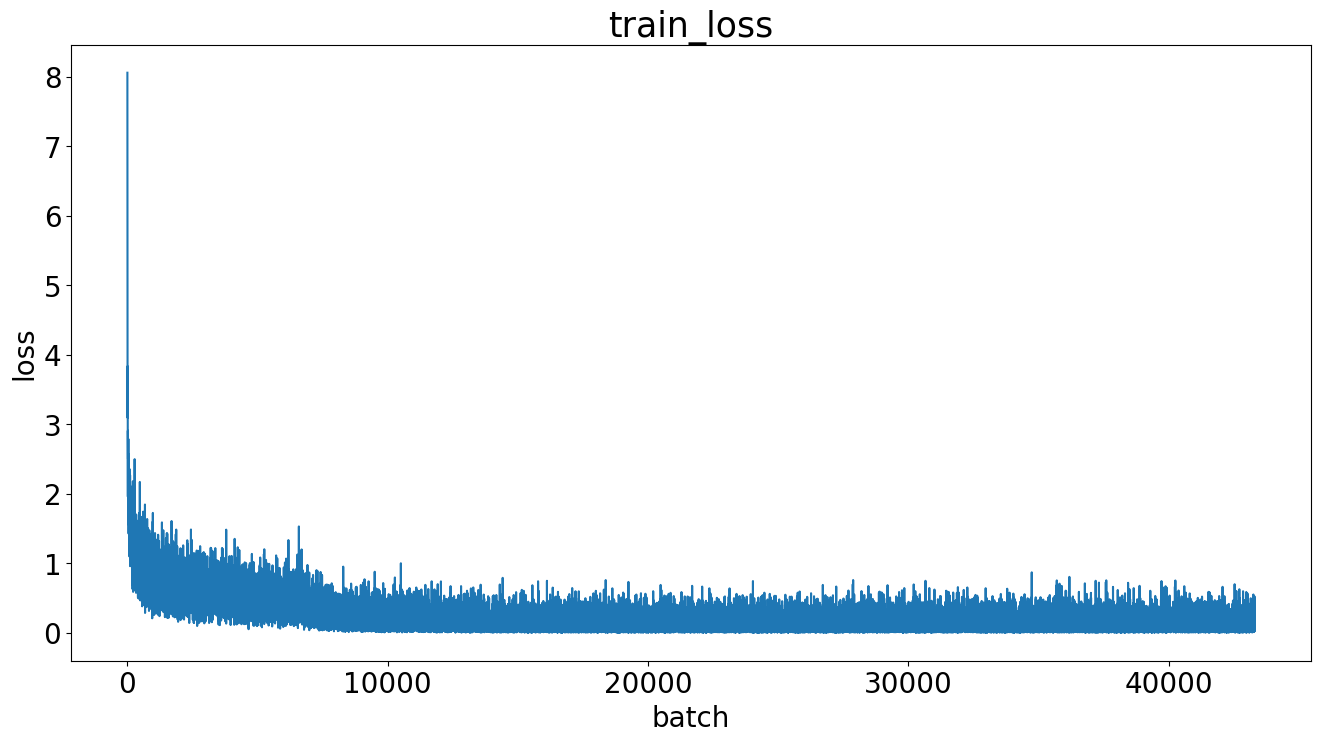

In [50]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_loss']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('chart/train_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

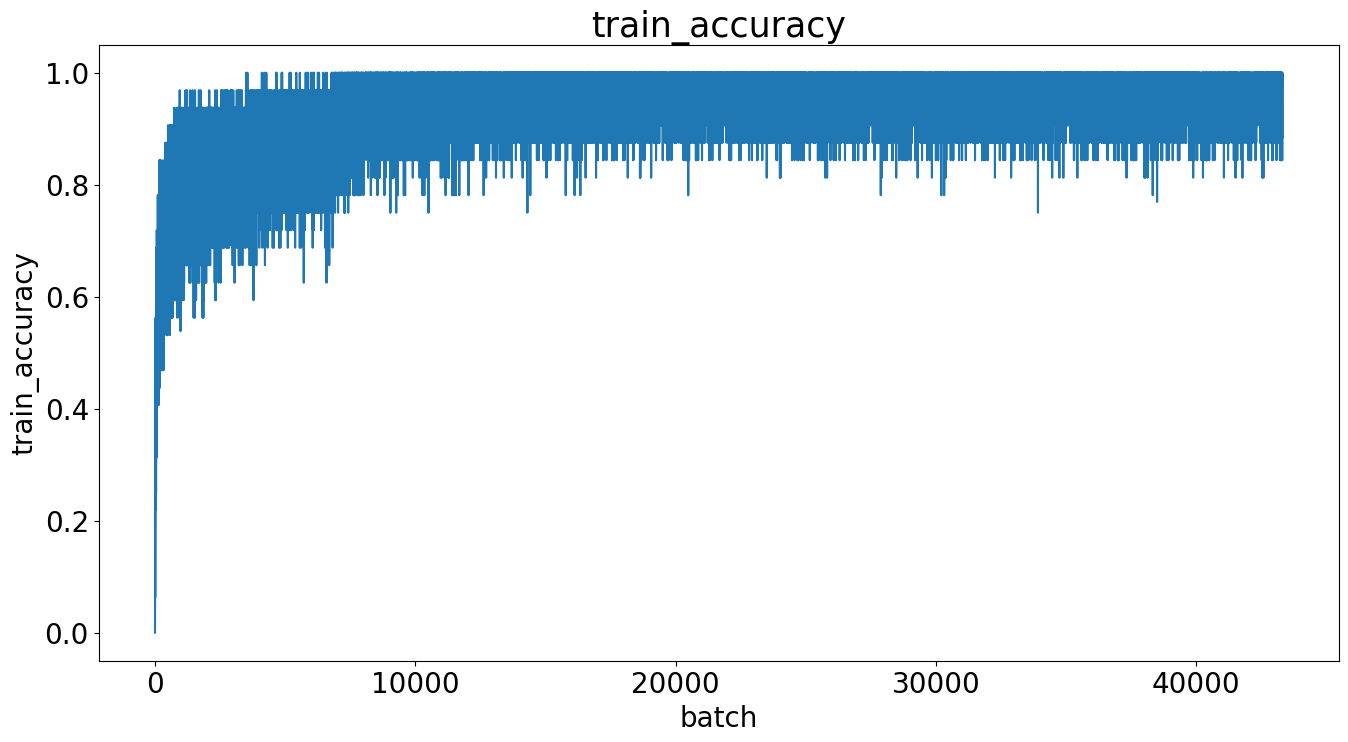

In [52]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_accuracy']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('train_accuracy', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('chart/train_accuracy.pdf', dpi=600, bbox_inches='tight')

plt.show()

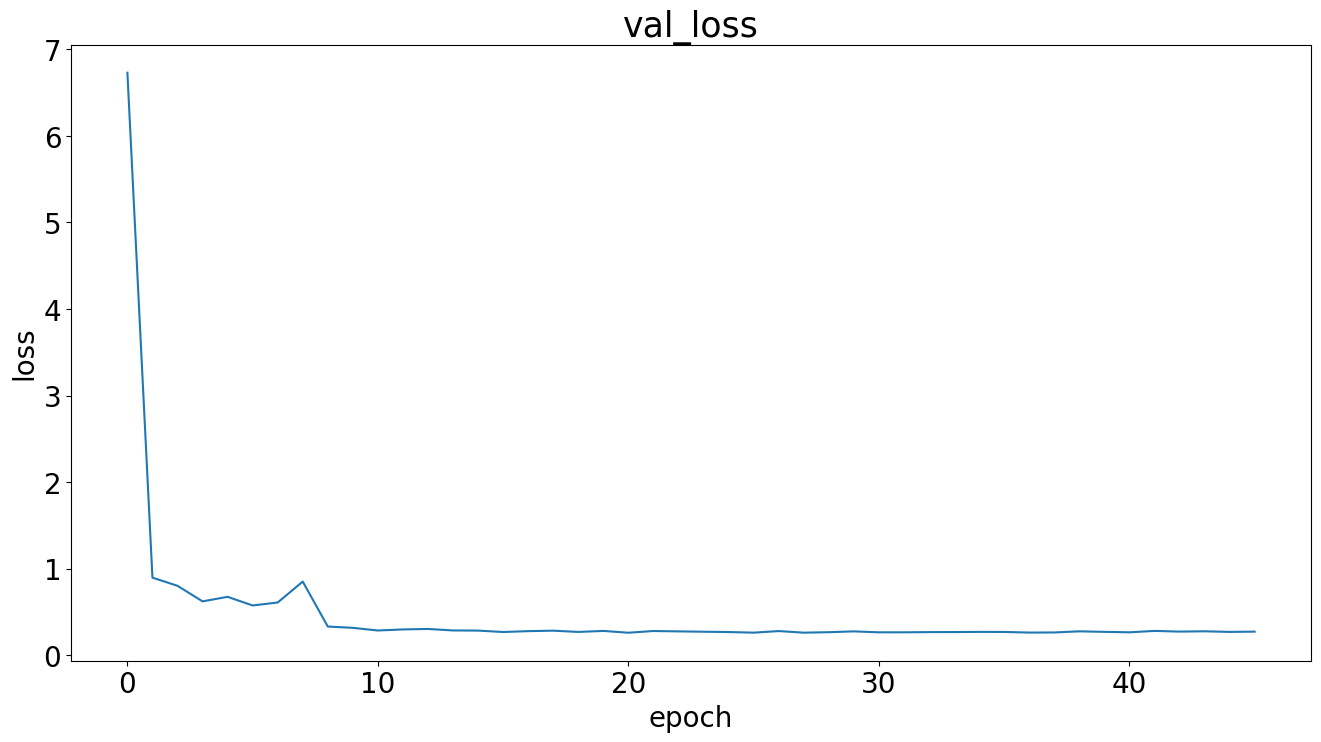

In [53]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
y = df_val['val_loss']

plt.plot(x, y, label='val')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('val_loss', fontsize=25)
plt.savefig('chart/val_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

In [54]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [55]:
metrics = ['val_accuracy', 'val_precision', 'val_recall', 'val_f1-score']

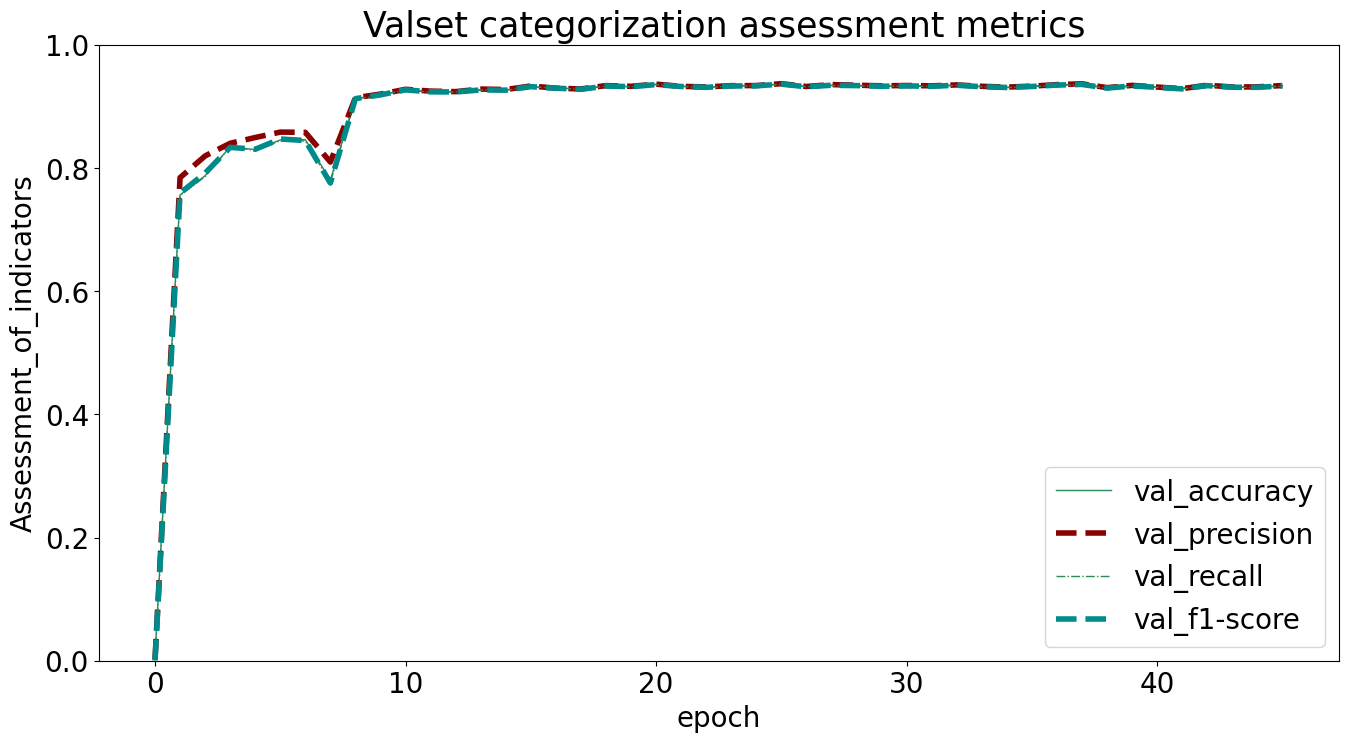

In [56]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
for y in metrics:
    plt.plot(x, df_val[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel('Assessment_of_indicators', fontsize=20)
plt.title(' Valset categorization assessment metrics', fontsize=25)
# plt.savefig('Chart/Valset_assessment_metrics.pdf', dpi=600, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# ensemble

In [59]:
torch.save(ensemble_model.state_dict(), 'goodensemblemodel.pth')

In [65]:
model = torch.load('goodensemblemodel.pth')
loaded_model = WeightedEnsembleModel(resnet_initial_weight, alexnet_initial_weight,efficientnet_weight)
loaded_model.load_state_dict(model)

<All keys matched successfully>

In [66]:
loaded_model.eval()
print(evaluate_valset())

{'epoch': 45, 'val_loss': 0.26568878, 'val_accuracy': 0.9334778639890461, 'val_precision': 0.9332625815196962, 'val_recall': 0.9330114769695428, 'val_f1-score': 0.9330364067312725}


In [56]:
model = torch.load('checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))

In [57]:
# model = torch.load('checkpoint/best-0.938.pth')
# model = model.eval().to(device)

In [58]:
model.eval()
print(evaluate_valset())

{'epoch': 45, 'val_loss': 0.26254317, 'val_accuracy': 0.9317663167503423, 'val_precision': 0.931555291829614, 'val_recall': 0.9315190231344306, 'val_f1-score': 0.931369811979171}


In [46]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df_train = pd.read_csv('Training_log_training_sets.csv')
df_val = pd.read_csv('Training_Log_val_Set.csv')

In [48]:
df_train

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,8.068102,0.00000,0.000000,0.000000,0.000000
1,1,1,6.443697,0.00000,0.000000,0.000000,0.000000
2,1,2,10.329677,0.00000,0.000000,0.000000,0.000000
3,1,3,5.865743,0.00000,0.000000,0.000000,0.000000
4,1,4,4.829241,0.09375,0.073529,0.073529,0.068627
...,...,...,...,...,...,...,...
43286,45,43286,0.319814,0.93750,0.920000,0.886667,0.898667
43287,45,43287,0.239834,0.93750,0.880000,0.860000,0.866667
43288,45,43288,0.099737,0.96875,0.961538,0.948718,0.953846
43289,45,43289,0.128407,0.96875,0.920000,0.920000,0.920000


In [49]:
df_val

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,6.388422,0.009927,0.000867,0.000508,0.000479
1,1,0.925581,0.755477,0.776135,0.756174,0.753366
2,2,0.691452,0.818576,0.828654,0.818008,0.819053
3,3,0.623212,0.830329,0.842009,0.829288,0.831021
4,4,0.639458,0.825764,0.838319,0.825620,0.826502
5,5,0.544495,0.854176,0.859797,0.853567,0.854395
6,6,0.588348,0.850411,0.854949,0.851367,0.849612
7,7,0.527463,0.862277,0.868274,0.860272,0.861470
8,8,0.320678,0.915221,0.915511,0.914628,0.914834
9,9,0.310102,0.920128,0.919662,0.919693,0.919379


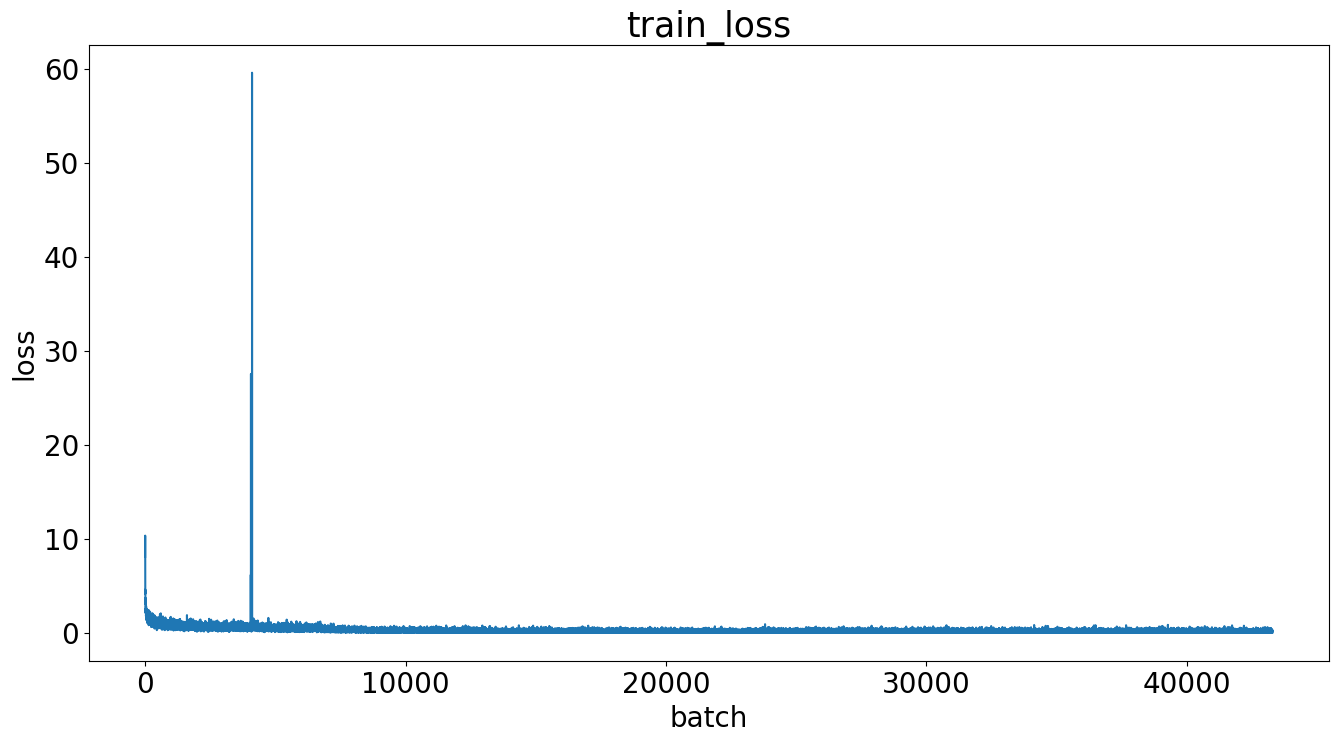

In [50]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_loss']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('chart/train_loss.pdf', dpi=120, bbox_inches='tight')

plt.show()

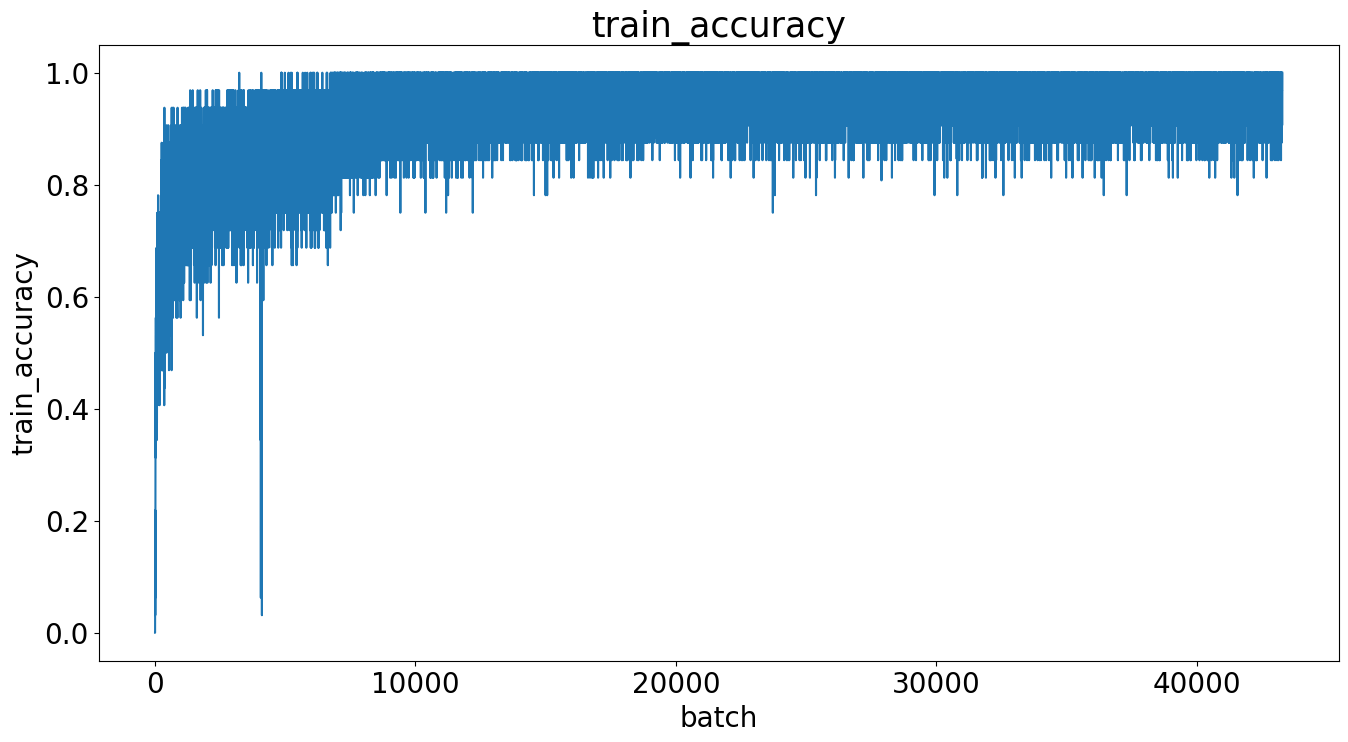

In [51]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_accuracy']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('train_accuracy', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('chart/train_accuracy.pdf', dpi=120, bbox_inches='tight')

plt.show()

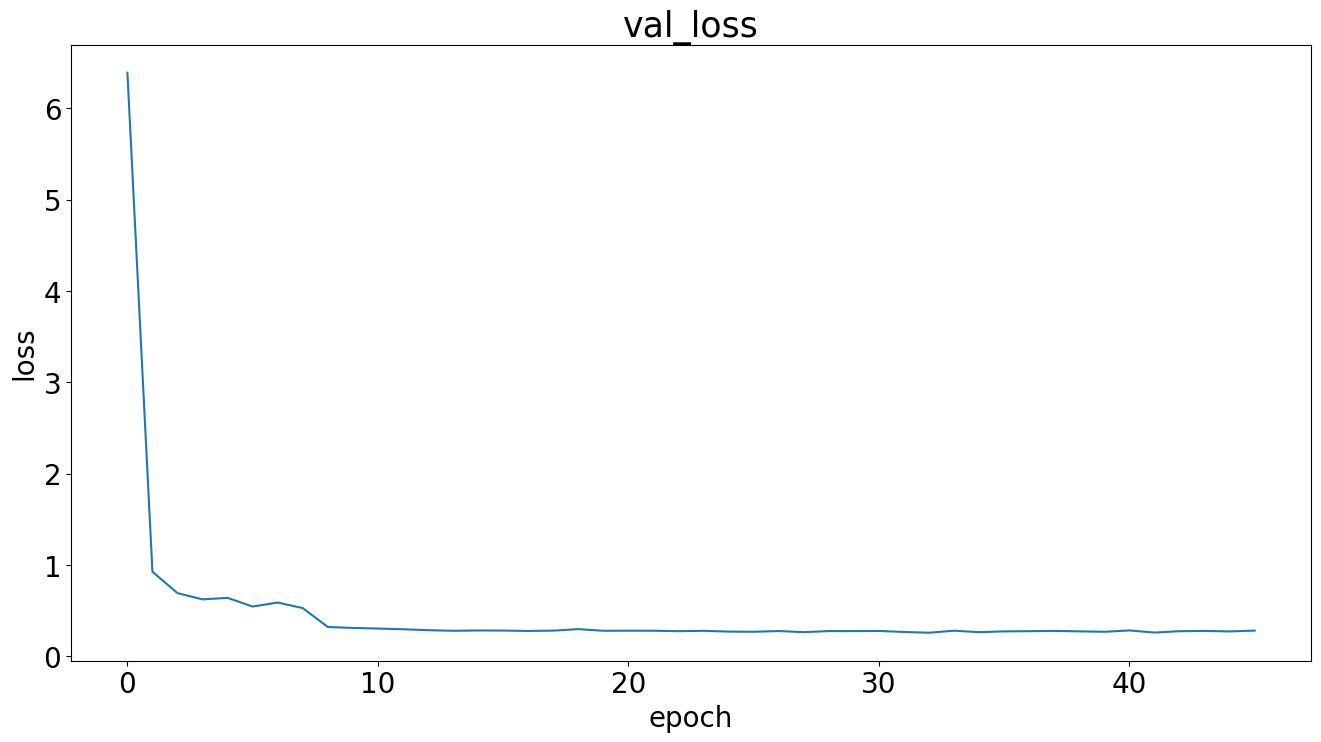

In [52]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
y = df_val['val_loss']

plt.plot(x, y, label='val')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('val_loss', fontsize=25)
plt.savefig('chart/val_loss.pdf', dpi=120, bbox_inches='tight')

plt.show()

In [53]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [54]:
metrics = ['val_accuracy', 'val_precision', 'val_recall', 'val_f1-score']

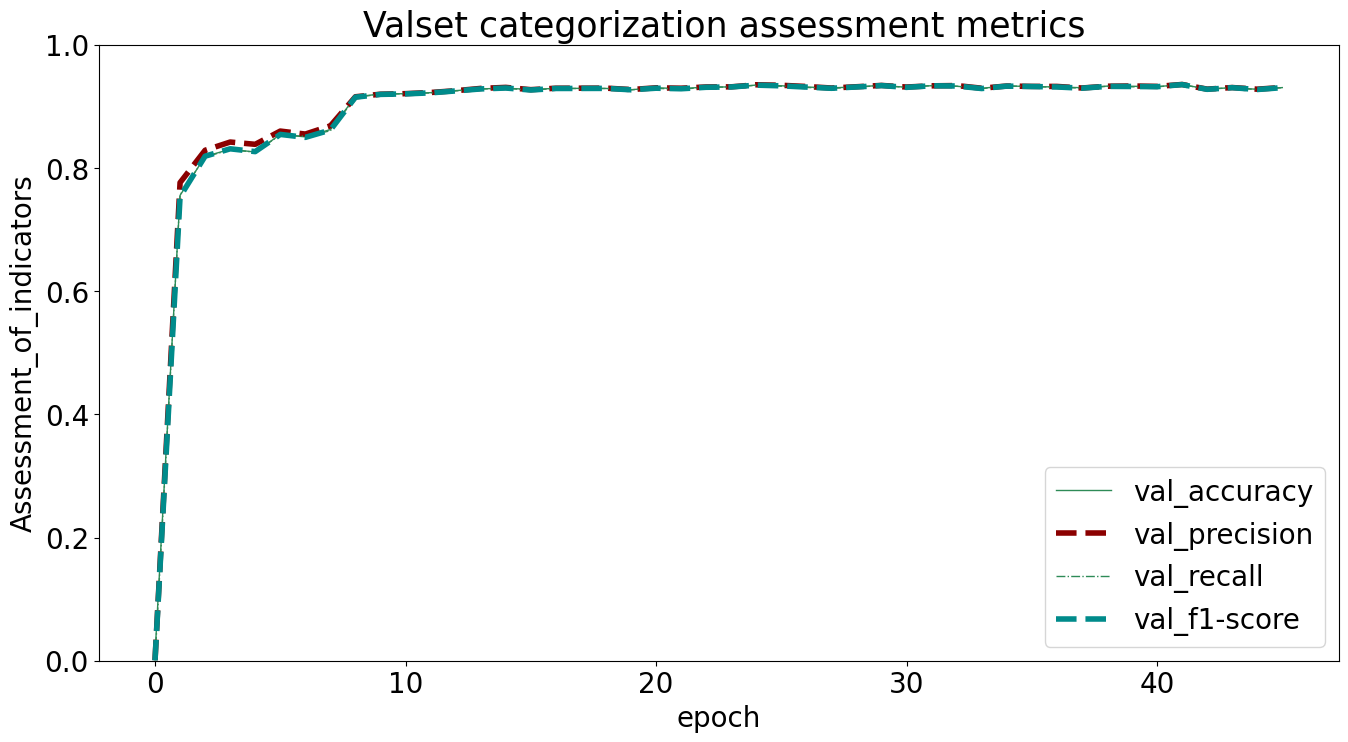

In [55]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
for y in metrics:
    plt.plot(x, df_val[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel('Assessment_of_indicators', fontsize=20)
plt.title(' Valset categorization assessment metrics', fontsize=25)
# plt.savefig('Chart/Valset_assessment_metrics.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# model

In [30]:
from torchvision import models
from torch.nn import init
import math
import copy
from functools import partial
from collections import OrderedDict
from typing import Optional, Callable

import torch
import torch.nn as nn
from torch import Tensor
from torch.nn import functional as F

# 创建模型实例，初始化权重
resnet_initial_weight = 0.1
alexnet_initial_weight = 0.2
efficientnet_weight =0.7

class SEAttention(nn.Module):

    def __init__(self, channel=512,reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )


    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                init.constant_(m.weight, 1)
                init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                init.normal_(m.weight, std=0.001)
                if m.bias is not None:
                    init.constant_(m.bias, 0)

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

#AlexNet

class AlexNet(nn.Module):
    def __init__(self, num_classes=44, init_weights=False):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=2),  # input[3, 224, 224]  output[48, 55, 55]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[48, 27, 27]
            nn.Conv2d(48, 128, kernel_size=5, padding=2),           # output[128, 27, 27]
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 13, 13]
            nn.Conv2d(128, 192, kernel_size=3, padding=1),          # output[192, 13, 13]
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 192, kernel_size=3, padding=1),          # output[192, 13, 13]
            nn.ReLU(inplace=True),
            nn.Conv2d(192, 128, kernel_size=3, padding=1),          # output[128, 13, 13]
            SEAttention(128,8),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                  # output[128, 6, 6]
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(128 * 6 * 6, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

#resnet

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_channel, out_channel, stride=1, downsample=None,
                 groups=1, width_per_group=64):
        super(Bottleneck, self).__init__()

        width = int(out_channel * (width_per_group / 64.)) * groups

        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=width,
                               kernel_size=1, stride=1, bias=False)  # squeeze channels
        self.bn1 = nn.BatchNorm2d(width)
        # -----------------------------------------
        self.conv2 = nn.Conv2d(in_channels=width, out_channels=width, groups=groups,
                               kernel_size=3, stride=stride, bias=False, padding=1)
        self.bn2 = nn.BatchNorm2d(width)
        # -----------------------------------------
        self.conv3 = nn.Conv2d(in_channels=width, out_channels=out_channel*self.expansion,
                               kernel_size=1, stride=1, bias=False)  # unsqueeze channels
        self.bn3 = nn.BatchNorm2d(out_channel*self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):

    def __init__(self,
                 block,
                 blocks_num,
                 num_classes=44,
                 include_top=True,
                 groups=1,
                 width_per_group=64):
        super(ResNet, self).__init__()
        self.include_top = include_top
        self.in_channel = 64

        self.groups = groups
        self.width_per_group = width_per_group

        self.conv1 = nn.Conv2d(3, self.in_channel, kernel_size=7, stride=2,
                               padding=3, bias=False)
        self.SE=SEAttention(self.in_channel,8)
        self.bn1 = nn.BatchNorm2d(self.in_channel)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, blocks_num[0])
        self.layer2 = self._make_layer(block, 128, blocks_num[1], stride=2)
        self.layer3 = self._make_layer(block, 256, blocks_num[2], stride=2)
        self.layer4 = self._make_layer(block, 512, blocks_num[3], stride=2)
        if self.include_top:
            self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # output size = (1, 1)
            self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

    def _make_layer(self, block, channel, block_num, stride=1):
        downsample = None
        if stride != 1 or self.in_channel != channel * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channel, channel * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(channel * block.expansion))

        layers = []
        layers.append(block(self.in_channel,
                            channel,
                            downsample=downsample,
                            stride=stride,
                            groups=self.groups,
                            width_per_group=self.width_per_group))
        self.in_channel = channel * block.expansion

        for _ in range(1, block_num):
            layers.append(block(self.in_channel,
                                channel,
                                groups=self.groups,
                                width_per_group=self.width_per_group))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.SE(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        if self.include_top:
            x = self.avgpool(x)
            x = torch.flatten(x, 1)
            x = self.fc(x)

        return x


def resnet50(num_classes=44, include_top=True):
    # https://download.pytorch.org/models/resnet50-19c8e357.pth
    return ResNet(Bottleneck, [3, 4, 6, 3], num_classes=num_classes, include_top=include_top)


# def resnet101(num_classes=1000, include_top=True):
#     # https://download.pytorch.org/models/resnet101-5d3b4d8f.pth
#     return ResNet(Bottleneck, [3, 4, 23, 3], num_classes=num_classes, include_top=include_top)
#
#
# def resnext50_32x4d(num_classes=1000, include_top=True):
#     # https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth
#     groups = 32
#     width_per_group = 4
#     return ResNet(Bottleneck, [3, 4, 6, 3],
#                   num_classes=num_classes,
#                   include_top=include_top,
#                   groups=groups,
#                   width_per_group=width_per_group)
#
#
# def resnext101_32x8d(num_classes=1000, include_top=True):
#     # https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth
#     groups = 32
#     width_per_group = 8
#     return ResNet(Bottleneck, [3, 4, 23, 3],
#                   num_classes=num_classes,
#                   include_top=include_top,
#                   groups=groups,
#                   width_per_group=width_per_group)
#
# def resnext152(num_classes=1000, include_top=True):
#     # https://download.pytorch.org/models/resnet152-b121ed2d.pth
#     groups = 32
#     width_per_group = 8
#     return ResNet(Bottleneck, [3, 8, 36, 3],
#                   num_classes=num_classes,
#                   include_top=include_top,
#                   groups=groups,
#                   width_per_group=width_per_group)


#efficientnet

def _make_divisible(ch, divisor=8, min_ch=None):
    """
    This function is taken from the original tf repo.
    It ensures that all layers have a channel number that is divisible by 8
    It can be seen here:
    https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/mobilenet.py
    """
    if min_ch is None:
        min_ch = divisor
    new_ch = max(min_ch, int(ch + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_ch < 0.9 * ch:
        new_ch += divisor
    return new_ch


def drop_path(x, drop_prob: float = 0., training: bool = False):
    """
    Drop paths (Stochastic Depth) per sample (when applied in main path of residual blocks).
    "Deep Networks with Stochastic Depth", https://arxiv.org/pdf/1603.09382.pdf

    This function is taken from the rwightman.
    It can be seen here:
    https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/layers/drop.py#L140
    """
    if drop_prob == 0. or not training:
        return x
    keep_prob = 1 - drop_prob
    shape = (x.shape[0],) + (1,) * (x.ndim - 1)  # work with diff dim tensors, not just 2D ConvNets
    random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
    random_tensor.floor_()  # binarize
    output = x.div(keep_prob) * random_tensor
    return output


class DropPath(nn.Module):
    """
    Drop paths (Stochastic Depth) per sample  (when applied in main path of residual blocks).
    "Deep Networks with Stochastic Depth", https://arxiv.org/pdf/1603.09382.pdf
    """
    def __init__(self, drop_prob=None):
        super(DropPath, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training)


class ConvBNActivation(nn.Sequential):
    def __init__(self,
                 in_planes: int,
                 out_planes: int,
                 kernel_size: int = 3,
                 stride: int = 1,
                 groups: int = 1,
                 norm_layer: Optional[Callable[..., nn.Module]] = None,
                 activation_layer: Optional[Callable[..., nn.Module]] = None):
        padding = (kernel_size - 1) // 2
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if activation_layer is None:
            activation_layer = nn.SiLU  # alias Swish  (torch>=1.7)

        super(ConvBNActivation, self).__init__(nn.Conv2d(in_channels=in_planes,
                                                         out_channels=out_planes,
                                                         kernel_size=kernel_size,
                                                         stride=stride,
                                                         padding=padding,
                                                         groups=groups,
                                                         bias=False),
                                               norm_layer(out_planes),
                                               activation_layer())


class SqueezeExcitation(nn.Module):
    def __init__(self,
                 input_c: int,   # block input channel
                 expand_c: int,  # block expand channel
                 squeeze_factor: int = 4):
        super(SqueezeExcitation, self).__init__()
        squeeze_c = input_c // squeeze_factor
        self.fc1 = nn.Conv2d(expand_c, squeeze_c, 1)
        self.ac1 = nn.SiLU()  # alias Swish
        self.fc2 = nn.Conv2d(squeeze_c, expand_c, 1)
        self.ac2 = nn.Sigmoid()

    def forward(self, x: Tensor) -> Tensor:
        scale = F.adaptive_avg_pool2d(x, output_size=(1, 1))
        scale = self.fc1(scale)
        scale = self.ac1(scale)
        scale = self.fc2(scale)
        scale = self.ac2(scale)
        return scale * x


class InvertedResidualConfig:
    # kernel_size, in_channel, out_channel, exp_ratio, strides, use_SE, drop_connect_rate
    def __init__(self,
                 kernel: int,          # 3 or 5
                 input_c: int,
                 out_c: int,
                 expanded_ratio: int,  # 1 or 6
                 stride: int,          # 1 or 2
                 use_se: bool,         # True
                 drop_rate: float,
                 index: str,           # 1a, 2a, 2b, ...
                 width_coefficient: float):
        self.input_c = self.adjust_channels(input_c, width_coefficient)
        self.kernel = kernel
        self.expanded_c = self.input_c * expanded_ratio
        self.out_c = self.adjust_channels(out_c, width_coefficient)
        self.use_se = use_se
        self.stride = stride
        self.drop_rate = drop_rate
        self.index = index

    @staticmethod
    def adjust_channels(channels: int, width_coefficient: float):
        return _make_divisible(channels * width_coefficient, 8)


class InvertedResidual(nn.Module):
    def __init__(self,
                 cnf: InvertedResidualConfig,
                 norm_layer: Callable[..., nn.Module]):
        super(InvertedResidual, self).__init__()

        if cnf.stride not in [1, 2]:
            raise ValueError("illegal stride value.")

        self.use_res_connect = (cnf.stride == 1 and cnf.input_c == cnf.out_c)

        layers = OrderedDict()
        activation_layer = nn.SiLU  # alias Swish

        # expand
        if cnf.expanded_c != cnf.input_c:
            layers.update({"expand_conv": ConvBNActivation(cnf.input_c,
                                                           cnf.expanded_c,
                                                           kernel_size=1,
                                                           norm_layer=norm_layer,
                                                           activation_layer=activation_layer)})

        # depthwise
        layers.update({"dwconv": ConvBNActivation(cnf.expanded_c,
                                                  cnf.expanded_c,
                                                  kernel_size=cnf.kernel,
                                                  stride=cnf.stride,
                                                  groups=cnf.expanded_c,
                                                  norm_layer=norm_layer,
                                                  activation_layer=activation_layer)})

        if cnf.use_se:
            layers.update({"se": SqueezeExcitation(cnf.input_c,
                                                   cnf.expanded_c)})

        # project
        layers.update({"project_conv": ConvBNActivation(cnf.expanded_c,
                                                        cnf.out_c,
                                                        kernel_size=1,
                                                        norm_layer=norm_layer,
                                                        activation_layer=nn.Identity)})

        self.block = nn.Sequential(layers)
        self.out_channels = cnf.out_c
        self.is_strided = cnf.stride > 1

        # 只有在使用shortcut连接时才使用dropout层
        if self.use_res_connect and cnf.drop_rate > 0:
            self.dropout = DropPath(cnf.drop_rate)
        else:
            self.dropout = nn.Identity()

    def forward(self, x: Tensor) -> Tensor:
        result = self.block(x)
        result = self.dropout(result)
        if self.use_res_connect:
            result += x

        return result


class EfficientNet(nn.Module):
    def __init__(self,
                 width_coefficient: float,
                 depth_coefficient: float,
                 num_classes: int = 44,
                 dropout_rate: float = 0.2,
                 drop_connect_rate: float = 0.2,
                 block: Optional[Callable[..., nn.Module]] = None,
                 norm_layer: Optional[Callable[..., nn.Module]] = None
                 ):
        super(EfficientNet, self).__init__()

        # kernel_size, in_channel, out_channel, exp_ratio, strides, use_SE, drop_connect_rate, repeats
        default_cnf = [[3, 32, 16, 1, 1, True, drop_connect_rate, 1],
                       [3, 16, 24, 6, 2, True, drop_connect_rate, 2],
                       [5, 24, 40, 6, 2, True, drop_connect_rate, 2],
                       [3, 40, 80, 6, 2, True, drop_connect_rate, 3],
                       [5, 80, 112, 6, 1, True, drop_connect_rate, 3],
                       [5, 112, 192, 6, 2, True, drop_connect_rate, 4],
                       [3, 192, 320, 6, 1, True, drop_connect_rate, 1]]

        def round_repeats(repeats):
            """Round number of repeats based on depth multiplier."""
            return int(math.ceil(depth_coefficient * repeats))

        if block is None:
            block = InvertedResidual

        if norm_layer is None:
            norm_layer = partial(nn.BatchNorm2d, eps=1e-3, momentum=0.1)

        adjust_channels = partial(InvertedResidualConfig.adjust_channels,
                                  width_coefficient=width_coefficient)

        # build inverted_residual_setting
        bneck_conf = partial(InvertedResidualConfig,
                             width_coefficient=width_coefficient)

        b = 0
        num_blocks = float(sum(round_repeats(i[-1]) for i in default_cnf))
        inverted_residual_setting = []
        for stage, args in enumerate(default_cnf):
            cnf = copy.copy(args)
            for i in range(round_repeats(cnf.pop(-1))):
                if i > 0:
                    # strides equal 1 except first cnf
                    cnf[-3] = 1  # strides
                    cnf[1] = cnf[2]  # input_channel equal output_channel

                cnf[-1] = args[-2] * b / num_blocks  # update dropout ratio
                index = str(stage + 1) + chr(i + 97)  # 1a, 2a, 2b, ...
                inverted_residual_setting.append(bneck_conf(*cnf, index))
                b += 1

        # create layers
        layers = OrderedDict()

        # first conv
        layers.update({"stem_conv": ConvBNActivation(in_planes=3,
                                                     out_planes=adjust_channels(32),
                                                     kernel_size=3,
                                                     stride=2,
                                                     norm_layer=norm_layer)})

        # building inverted residual blocks
        for cnf in inverted_residual_setting:
            layers.update({cnf.index: block(cnf, norm_layer)})

        # build top
        last_conv_input_c = inverted_residual_setting[-1].out_c
        last_conv_output_c = adjust_channels(1280)
        layers.update({"top": ConvBNActivation(in_planes=last_conv_input_c,
                                               out_planes=last_conv_output_c,
                                               kernel_size=1,
                                               norm_layer=norm_layer)})

        self.features = nn.Sequential(layers)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

        classifier = []
        if dropout_rate > 0:
            classifier.append(nn.Dropout(p=dropout_rate, inplace=True))
        classifier.append(nn.Linear(last_conv_output_c, num_classes))
        self.classifier = nn.Sequential(*classifier)

        # initial weights
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

    def _forward_impl(self, x: Tensor) -> Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)


def efficientnet_b0(num_classes=44):
    # input image size 224x224
    return EfficientNet(width_coefficient=1.0,
                        depth_coefficient=1.0,
                        dropout_rate=0.2,
                        num_classes=num_classes)

# def efficientnet_b1(num_classes=1000):
#     # input image size 240x240
#     return EfficientNet(width_coefficient=1.0,
#                         depth_coefficient=1.1,
#                         dropout_rate=0.2,
#                         num_classes=num_classes)
#
#
# def efficientnet_b2(num_classes=1000):
#     # input image size 260x260
#     return EfficientNet(width_coefficient=1.1,
#                         depth_coefficient=1.2,
#                         dropout_rate=0.3,
#                         num_classes=num_classes)
#
#
# def efficientnet_b3(num_classes=1000):
#     # input image size 300x300
#     return EfficientNet(width_coefficient=1.2,
#                         depth_coefficient=1.4,
#                         dropout_rate=0.3,
#                         num_classes=num_classes)
#
#
# def efficientnet_b4(num_classes=1000):
#     # input image size 380x380
#     return EfficientNet(width_coefficient=1.4,
#                         depth_coefficient=1.8,
#                         dropout_rate=0.4,
#                         num_classes=num_classes)
#
#
# def efficientnet_b5(num_classes=1000):
#     # input image size 456x456
#     return EfficientNet(width_coefficient=1.6,
#                         depth_coefficient=2.2,
#                         dropout_rate=0.4,
#                         num_classes=num_classes)
#
#
# def efficientnet_b6(num_classes=1000):
#     # input image size 528x528
#     return EfficientNet(width_coefficient=1.8,
#                         depth_coefficient=2.6,
#                         dropout_rate=0.5,
#                         num_classes=num_classes)
#
#
# def efficientnet_b7(num_classes=1000):
#     # input image size 600x600
#     return EfficientNet(width_coefficient=2.0,
#                         depth_coefficient=3.1,
#                         dropout_rate=0.5,
#                         num_classes=num_classes)


# 加载预训练的ResNet和AlexNet模型
# efficientnet=models.efficientnet_b0(pretrained=False)
# resnet = models.resnet50(pretrained=False)
# alexnet = models.alexnet(pretrained=False)


class WeightedEnsembleModel(nn.Module):
    def __init__(self, resnet_weight, alexnet_weight,efficientnet_weight):
        super(WeightedEnsembleModel, self).__init__()
        self.resnet = resnet50()
        self.alexnet = AlexNet()
        self.efficientnet = efficientnet_b0()

        self.resnet_weight = resnet_weight
        self.alexnet_weight = alexnet_weight
        self.efficientnet_weight=efficientnet_weight
        # 确保权重是可训练的参数
        self.resnet_weight = nn.Parameter(torch.tensor(resnet_weight))
        self.alexnet_weight = nn.Parameter(torch.tensor(alexnet_weight))
        self.efficientnet_weight = nn.Parameter(torch.tensor(efficientnet_weight))

    def forward(self, x):
        # 获取ResNet和AlexNet的输出
        resnet_output = self.resnet(x)
        alexnet_output = self.alexnet(x)
        efficientnet_output=self.efficientnet(x)
        # 加权相加
        combined_output = (self.resnet_weight * resnet_output +
                           self.alexnet_weight * alexnet_output+efficientnet_output*self.efficientnet_weight)

        return combined_output



model = WeightedEnsembleModel(resnet_initial_weight, alexnet_initial_weight,efficientnet_weight)


In [31]:
optimizer = optim.Adam(model.parameters())

In [32]:
model = model.to(device)

criterion = nn.CrossEntropyLoss() 

EPOCHS = 44
from torch.optim import lr_scheduler

lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [34]:
def train_one_batch(images, labels):
    
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = model(images) 
    loss = criterion(outputs, labels) 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1) 
    preds = preds.cpu().numpy()
    loss = loss.detach().cpu().numpy()
    outputs = outputs.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    
    log_train = {}
    log_train['epoch'] = epoch
    log_train['batch'] = batch_idx
   
    log_train['train_loss'] = loss
    log_train['train_accuracy'] = accuracy_score(labels, preds)
    log_train['train_precision'] = precision_score(labels, preds, average='macro')
    log_train['train_recall'] = recall_score(labels, preds, average='macro')
    log_train['train_f1-score'] = f1_score(labels, preds, average='macro')
    
    return log_train

In [35]:
def evaluate_valset():

    loss_list = []
    labels_list = []
    preds_list = []
    
    with torch.no_grad():
        for images, labels in val_loader: 
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images) 


            _, preds = torch.max(outputs, 1) 
            preds = preds.cpu().numpy()
            loss = criterion(outputs, labels) 
            loss = loss.detach().cpu().numpy()
            outputs = outputs.detach().cpu().numpy()
            labels = labels.detach().cpu().numpy()

            loss_list.append(loss)
            labels_list.extend(labels)
            preds_list.extend(preds)
        
    log_val = {}
    log_val['epoch'] = epoch
    
    log_val['val_loss'] = np.mean(loss_list)
    log_val['val_accuracy'] = accuracy_score(labels_list, preds_list)
    log_val['val_precision'] = precision_score(labels_list, preds_list, average='macro')
    log_val['val_recall'] = recall_score(labels_list, preds_list, average='macro')
    log_val['val_f1-score'] = f1_score(labels_list, preds_list, average='macro')
    
    return log_val

In [36]:
epoch = 0
batch_idx = 0
best_val_accuracy = 0

In [37]:
import pandas as pd

df_train_log = pd.DataFrame()
log_train = {}
log_train['epoch'] = 0
log_train['batch'] = 0
images, labels = next(iter(train_loader))
log_train.update(train_one_batch(images, labels))
df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)

In [38]:
df_train_log

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,3.7812595,0.03125,0.00188,0.011905,0.003247


In [39]:
df_val_log = pd.DataFrame()
log_val = {}
log_val['epoch'] = 0
log_val.update(evaluate_valset())
df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)

In [40]:
df_val_log

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,3.956923,0.022364,0.003485,0.022033,0.003232


In [ ]:
# import wandb
# wandb.init(project='fruit44', name=time.strftime('%m%d%H%M%S'))

In [44]:
for epoch in range(1, EPOCHS+1):
    
    print(f'Epoch {epoch}/{EPOCHS}')
    
    ## 训练阶段
    model.train()
    for images, labels in tqdm(train_loader): # 获得一个 batch 的数据和标注
        batch_idx += 1
        log_train = train_one_batch(images, labels)
        df_train_log = pd.concat([df_train_log, pd.DataFrame([log_train])], ignore_index=True)
        # wandb.log(log_train)
        
    lr_scheduler.step()

    ## 测试阶段
    model.eval()
    log_val = evaluate_valset()
    df_val_log = pd.concat([df_val_log, pd.DataFrame([log_val])], ignore_index=True)
    # wandb.log(log_val)
    
    # 保存最新的最佳模型文件
    if log_val['val_accuracy'] > best_val_accuracy: 
        # 删除旧的最佳模型文件(如有)
        old_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy)
        if os.path.exists(old_best_checkpoint_path):
            os.remove(old_best_checkpoint_path)
        # 保存新的最佳模型文件
        best_val_accuracy = log_val['val_accuracy']
        new_best_checkpoint_path = 'checkpoint/best-{:.3f}.pth'.format(log_val['val_accuracy'])
        torch.save(model, new_best_checkpoint_path)
        print('\nSave the new best model', 'checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))
        # best_test_accuracy = log_test['test_accuracy']

df_train_log.to_csv('Training_log_training_sets.csv', index=False)
df_val_log.to_csv('Training_Log_val_Set.csv', index=False)

Epoch 1/44


100%|██████████| 962/962 [01:25<00:00, 11.20it/s]



Save the new best model checkpoint/best-0.258.pth
Epoch 2/44


100%|██████████| 962/962 [01:24<00:00, 11.32it/s]



Save the new best model checkpoint/best-0.331.pth
Epoch 3/44


100%|██████████| 962/962 [01:26<00:00, 11.14it/s]



Save the new best model checkpoint/best-0.426.pth
Epoch 4/44


100%|██████████| 962/962 [01:28<00:00, 10.92it/s]



Save the new best model checkpoint/best-0.467.pth
Epoch 5/44


100%|██████████| 962/962 [01:29<00:00, 10.71it/s]



Save the new best model checkpoint/best-0.513.pth
Epoch 6/44


100%|██████████| 962/962 [01:27<00:00, 11.02it/s]



Save the new best model checkpoint/best-0.539.pth
Epoch 7/44


100%|██████████| 962/962 [01:31<00:00, 10.48it/s]



Save the new best model checkpoint/best-0.564.pth
Epoch 8/44


100%|██████████| 962/962 [01:27<00:00, 10.94it/s]



Save the new best model checkpoint/best-0.637.pth
Epoch 9/44


100%|██████████| 962/962 [01:25<00:00, 11.22it/s]



Save the new best model checkpoint/best-0.640.pth
Epoch 10/44


100%|██████████| 962/962 [01:33<00:00, 10.25it/s]



Save the new best model checkpoint/best-0.659.pth
Epoch 11/44


100%|██████████| 962/962 [01:31<00:00, 10.55it/s]



Save the new best model checkpoint/best-0.659.pth
Epoch 12/44


100%|██████████| 962/962 [01:31<00:00, 10.46it/s]



Save the new best model checkpoint/best-0.669.pth
Epoch 13/44


100%|██████████| 962/962 [01:33<00:00, 10.24it/s]


Epoch 14/44


100%|██████████| 962/962 [01:26<00:00, 11.14it/s]



Save the new best model checkpoint/best-0.678.pth
Epoch 15/44


100%|██████████| 962/962 [01:26<00:00, 11.08it/s]



Save the new best model checkpoint/best-0.685.pth
Epoch 16/44


100%|██████████| 962/962 [01:26<00:00, 11.10it/s]


Epoch 17/44


100%|██████████| 962/962 [01:25<00:00, 11.20it/s]


Epoch 18/44


100%|██████████| 962/962 [01:26<00:00, 11.06it/s]



Save the new best model checkpoint/best-0.685.pth
Epoch 19/44


100%|██████████| 962/962 [01:26<00:00, 11.08it/s]


Epoch 20/44


100%|██████████| 962/962 [01:27<00:00, 10.97it/s]


Epoch 21/44


100%|██████████| 962/962 [01:27<00:00, 10.94it/s]


Epoch 22/44


100%|██████████| 962/962 [01:28<00:00, 10.82it/s]


Epoch 23/44


100%|██████████| 962/962 [01:30<00:00, 10.65it/s]


Epoch 24/44


100%|██████████| 962/962 [01:27<00:00, 10.95it/s]


Epoch 25/44


100%|██████████| 962/962 [01:28<00:00, 10.88it/s]


Epoch 26/44


100%|██████████| 962/962 [01:28<00:00, 10.93it/s]


Epoch 27/44


100%|██████████| 962/962 [01:31<00:00, 10.56it/s]



Save the new best model checkpoint/best-0.686.pth
Epoch 28/44


 20%|█▉        | 190/962 [00:17<01:11, 10.77it/s]


KeyboardInterrupt: 

In [43]:
model = torch.load('checkpoint/best-{:.3f}.pth'.format(best_val_accuracy))

In [44]:
model.eval()
print(evaluate_valset())

{'epoch': 45, 'val_loss': 0.28350368, 'val_accuracy': 0.93073938840712, 'val_precision': 0.9309893818206657, 'val_recall': 0.9302062629647974, 'val_f1-score': 0.930460277305541}


In [45]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df_train = pd.read_csv('Training_log_training_attention.csv')
df_val = pd.read_csv('Training_Log_val_attention.csv')

In [48]:
df_train

,epoch,batch,train_loss,train_accuracy,train_precision,train_recall,train_f1-score
0,0,0,7.992647,0.000000,0.000000,0.000000,0.000000
1,1,1,6.395796,0.031250,0.010000,0.020000,0.013333
2,1,2,10.395729,0.093750,0.044705,0.076923,0.036686
3,1,3,4.596761,0.093750,0.053571,0.089286,0.062500
4,1,4,4.510097,0.187500,0.092033,0.166667,0.106293
...,...,...,...,...,...,...,...
43286,45,43286,0.041799,0.968750,0.960000,0.946667,0.952000
43287,45,43287,0.049372,0.968750,0.977273,0.984848,0.975758
43288,45,43288,0.099900,0.937500,0.833333,0.833333,0.833333
43289,45,43289,0.245846,0.906250,0.854167,0.854167,0.847222


In [49]:
df_val

,epoch,val_loss,val_accuracy,val_precision,val_recall,val_f1-score
0,0,6.786867,0.004792,0.001223,0.000216,0.000338
1,1,0.832704,0.770082,0.795979,0.771456,0.773695
2,2,0.789803,0.795299,0.815215,0.792205,0.796275
3,3,0.576466,0.842309,0.845777,0.841716,0.841448
4,4,0.581558,0.844135,0.848546,0.846412,0.843697
5,5,0.543632,0.854290,0.859041,0.854301,0.853905
6,6,0.512657,0.861935,0.863561,0.862229,0.860644
7,7,0.516409,0.861251,0.864920,0.861679,0.861074
8,8,0.325188,0.913624,0.913263,0.912868,0.912546
9,9,0.304974,0.918188,0.918717,0.917592,0.917760


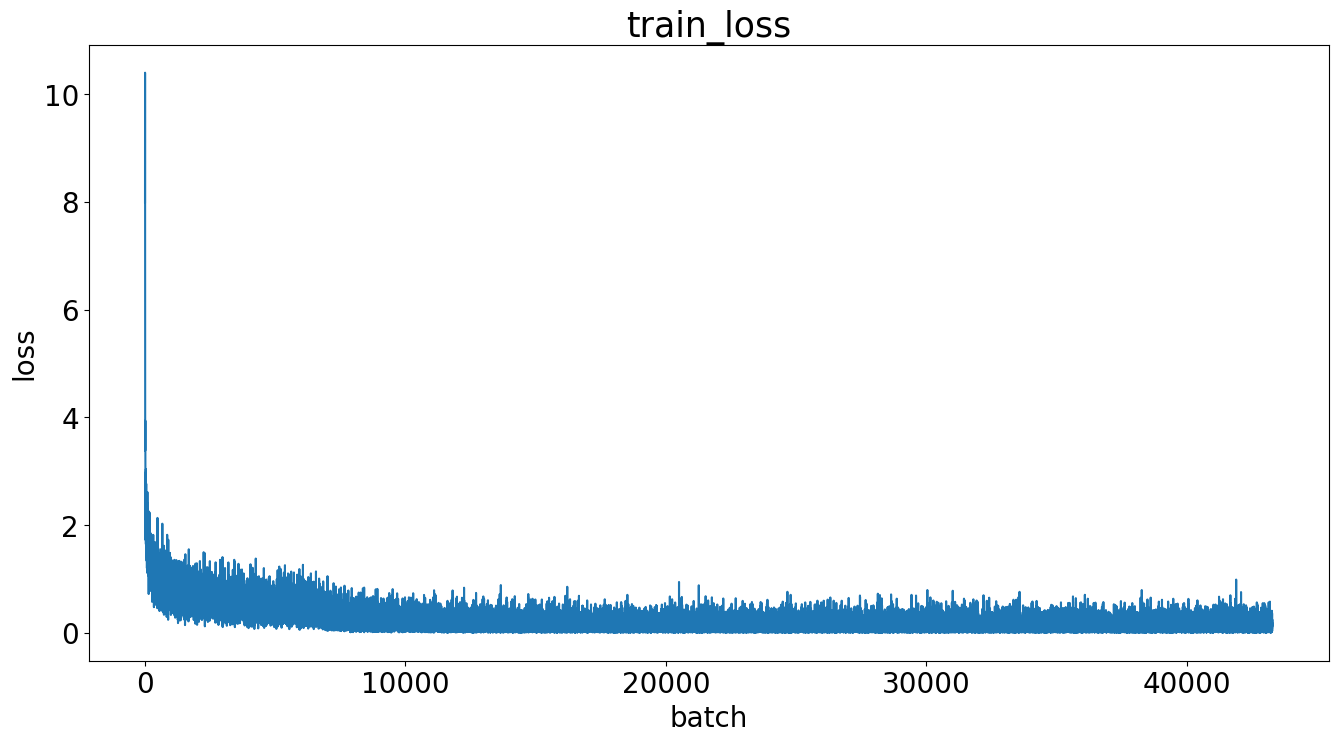

In [50]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_loss']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('train_loss', fontsize=25)
plt.savefig('chart/train_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

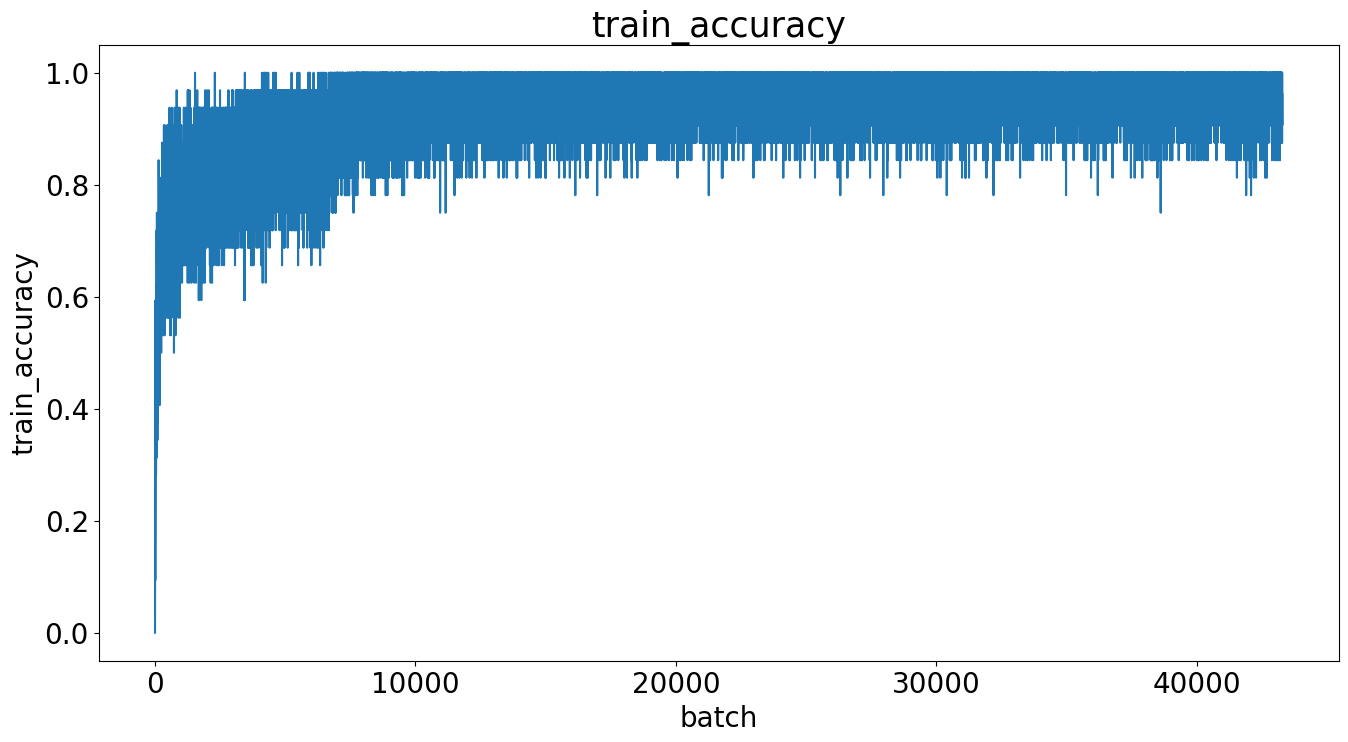

In [51]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_accuracy']

plt.plot(x, y, label='train')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('train_accuracy', fontsize=20)
plt.title('train_accuracy', fontsize=25)
plt.savefig('chart/train_accuracy.pdf', dpi=600, bbox_inches='tight')

plt.show()

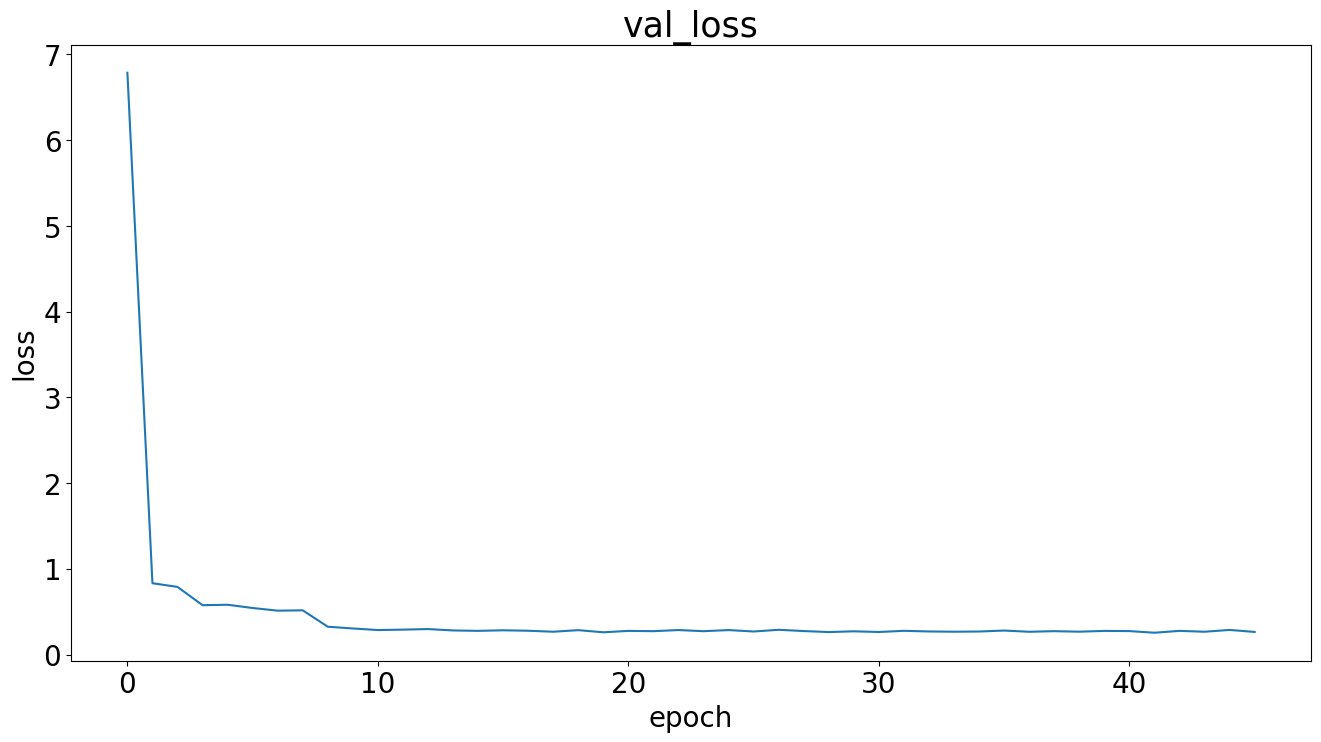

In [52]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
y = df_val['val_loss']

plt.plot(x, y, label='val')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('val_loss', fontsize=25)
plt.savefig('chart/val_loss.pdf', dpi=600, bbox_inches='tight')

plt.show()

In [53]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [54]:
metrics = ['val_accuracy', 'val_precision', 'val_recall', 'val_f1-score']

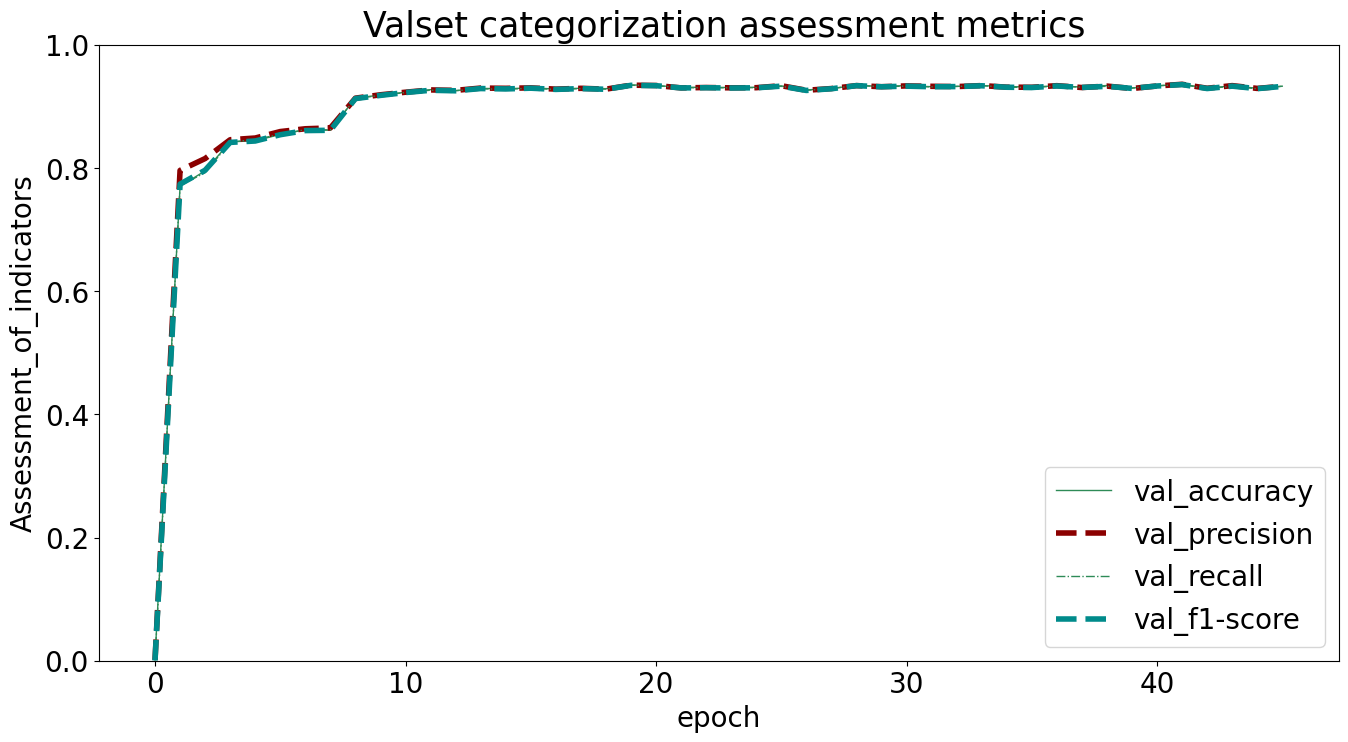

In [55]:
plt.figure(figsize=(16, 8))

x = df_val['epoch']
for y in metrics:
    plt.plot(x, df_val[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel('Assessment_of_indicators', fontsize=20)
plt.title(' Valset categorization assessment metrics', fontsize=25)
# plt.savefig('Chart/Valset_assessment_metrics.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()